<a href="https://colab.research.google.com/github/saghaa06/codeplateforme/blob/main/creditworthiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Chemin vers votre fichier uploadé dans l'espace de travail Colab
finance_data = '/content/5k.csv'

# Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv(finance_data)

# Afficher les premières lignes du DataFrame pour vérifier le chargement
print(df.head())

# Vérification rapide
print(df.head())

   Age Occupation Risk Tolerance     Investment Goals Income Level  \
0   40     Lawyer           High  Wealth Preservation    $46044.94   
1   30    Teacher            Low  Wealth Preservation    $57169.50   
2   37    Teacher            Low          Speculation    $71760.86   
3   27    Student         Medium          Speculation   $-25488.15   
4   36   Engineer            Low    Income Generation   $106777.95   

                                            Address Account Balance  \
0       7168 Moody Meadow\nHernandezshire, PW 06016       $44653.26   
1      50001 Hector Square\nWest Luisfurt, MA 51935       $29175.47   
2       997 James Isle\nNorth Rebeccafurt, RI 13366       $86141.59   
3  1607 Joshua Camp Apt. 634\nConleymouth, CT 66479        $1000.00   
4       96690 Campbell Common\nDwaynetown, MI 71857       $77918.97   

    Deposits Withdrawals  Transfers International Transfers Investments  \
0   $9156.01    $9327.70   $3647.92                  $82.80    $8729.30   
1 

In [ ]:
# Check the data types of the Columns
print(df.dtypes)

Age                         int64
Occupation                 object
Risk Tolerance             object
Investment Goals           object
Income Level               object
Address                    object
Account Balance            object
Deposits                   object
Withdrawals                object
Transfers                  object
International Transfers    object
Investments                object
Loan Amount                object
Loan Purpose               object
Employment Status          object
Loan Term (Months)          int64
Interest Rate              object
Loan Status                object
Transaction Description    object
dtype: object


In [ ]:
# Remove the dollar sign and commas from currency columns and convert them to numeric
currency_columns = ['Income Level', 'Account Balance', 'Deposits', 'Withdrawals', 'Transfers',
                    'International Transfers', 'Investments', 'Loan Amount']

for col in currency_columns:
     df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Print the dataframe to check the changes
df.head()

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-974056544.py:6: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)


,Age,Occupation,Risk Tolerance,Investment Goals,Income Level,Address,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status,Transaction Description
0,40,Lawyer,High,Wealth Preservation,46044.94,"7168 Moody Meadow\nHernandezshire, PW 06016",44653.26,9156.01,9327.70,3647.92,82.80,8729.30,27010.93,Medical Expenses,Retired,36,11.94%,pending,"Electronics transaction of $706.18 at Sanders,..."
1,30,Teacher,Low,Wealth Preservation,57169.50,"50001 Hector Square\nWest Luisfurt, MA 51935",29175.47,5933.22,8671.60,6729.86,819.69,4545.18,31266.97,Auto Purchase,Retired,36,8.08%,approved,Transaction at Evans-Smith for $2250.03
2,37,Teacher,Low,Speculation,71760.86,"997 James Isle\nNorth Rebeccafurt, RI 13366",86141.59,22583.11,16468.58,6032.53,1526.33,8251.45,41260.58,Auto Purchase,Employed,12,13.07%,pending,Purchase at Taylor-Gutierrez for $615.85 on 20...
3,27,Student,Medium,Speculation,-25488.15,"1607 Joshua Camp Apt. 634\nConleymouth, CT 66479",1000.00,299.47,289.09,109.83,3.51,195.73,5000.00,Small Business,Retired,60,6.73%,approved,Travel transaction of $4852.39 at Jones-Russell
4,36,Engineer,Low,Income Generation,106777.95,"96690 Campbell Common\nDwaynetown, MI 71857",77918.97,13853.25,22699.32,12189.32,2152.51,9725.21,50000.00,Medical Expenses,Employed,24,10.60%,approved,"Purchase at Jensen, Porter and Webb for $562.2..."


In [ ]:


# Change the numerical columns data type to integer
df[col] = df[col].astype(int)
print(df.dtypes)



Age                          int64
Occupation                  object
Risk Tolerance              object
Investment Goals            object
Income Level               float64
Address                     object
Account Balance            float64
Deposits                   float64
Withdrawals                float64
Transfers                  float64
International Transfers    float64
Investments                float64
Loan Amount                  int64
Loan Purpose                object
Employment Status           object
Loan Term (Months)           int64
Interest Rate               object
Loan Status                 object
Transaction Description     object
dtype: object


In [ ]:
# Remove the percentage sign in Interest Rate and convert the rate into decimal format
df['Interest Rate'] = df['Interest Rate'].replace({'%': ''}, regex=True).astype(float) / 100

print(df.dtypes)

Age                          int64
Occupation                  object
Risk Tolerance              object
Investment Goals            object
Income Level               float64
Address                     object
Account Balance            float64
Deposits                   float64
Withdrawals                float64
Transfers                  float64
International Transfers    float64
Investments                float64
Loan Amount                  int64
Loan Purpose                object
Employment Status           object
Loan Term (Months)           int64
Interest Rate              float64
Loan Status                 object
Transaction Description     object
dtype: object


In [ ]:
# First five rows in the Dataset
df.head()

,Age,Risk Tolerance,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status
0,40,High,46044.94,44653.26,9156.01,9327.70,3647.92,82.80,8729.30,27010,Medical Expenses,Retired,36,0.1194,pending
1,30,Low,57169.50,29175.47,5933.22,8671.60,6729.86,819.69,4545.18,31266,Auto Purchase,Retired,36,0.0808,approved
2,37,Low,71760.86,86141.59,22583.11,16468.58,6032.53,1526.33,8251.45,41260,Auto Purchase,Employed,12,0.1307,pending
3,27,Medium,-25488.15,1000.00,299.47,289.09,109.83,3.51,195.73,5000,Small Business,Retired,60,0.0673,approved
4,36,Low,106777.95,77918.97,13853.25,22699.32,12189.32,2152.51,9725.21,50000,Medical Expenses,Employed,24,0.1060,approved


In [ ]:
# Drop irrelevant columns that are not useful
df.drop(['Occupation','Investment Goals','Address', 'Transaction Description','Transaction Description'], axis=1, inplace=True)

# Print the dataset after dropping the columns to check
df.head()

KeyError: "['Occupation', 'Investment Goals', 'Address', 'Transaction Description', 'Transaction Description'] not found in axis"

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Loan Purpose' to numerical
df['Loan Purpose'] = label_encoder.fit_transform(df['Loan Purpose'])

# Convert 'Employment Status' to numerical
df['Employment Status'] = label_encoder.fit_transform(df['Employment Status'])

# Convert 'Risk Tolerance' to numerical
df['Risk Tolerance'] = label_encoder.fit_transform(df['Risk Tolerance'])

# Convert 'Loan Status' to numerical
df['Loan Status'] = label_encoder.fit_transform(df['Loan Status'])

# Check the updated DataFrame
df.head()

,Age,Risk Tolerance,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status
0,40,0,46044.94,44653.26,9156.01,9327.70,3647.92,82.80,8729.30,27010,3,1,36,0.1194,1
1,30,1,57169.50,29175.47,5933.22,8671.60,6729.86,819.69,4545.18,31266,0,1,36,0.0808,0
2,37,1,71760.86,86141.59,22583.11,16468.58,6032.53,1526.33,8251.45,41260,0,0,12,0.1307,1
3,27,2,-25488.15,1000.00,299.47,289.09,109.83,3.51,195.73,5000,4,1,60,0.0673,0
4,36,1,106777.95,77918.97,13853.25,22699.32,12189.32,2152.51,9725.21,50000,3,0,24,0.1060,0


In [ ]:
# Check for null values in each column
null_values = df.isnull().sum()

print(null_values)

Age                        0
Risk Tolerance             0
Income Level               0
Account Balance            0
Deposits                   0
Withdrawals                0
Transfers                  0
International Transfers    0
Investments                0
Loan Amount                0
Loan Purpose               0
Employment Status          0
Loan Term (Months)         0
Interest Rate              0
Loan Status                0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


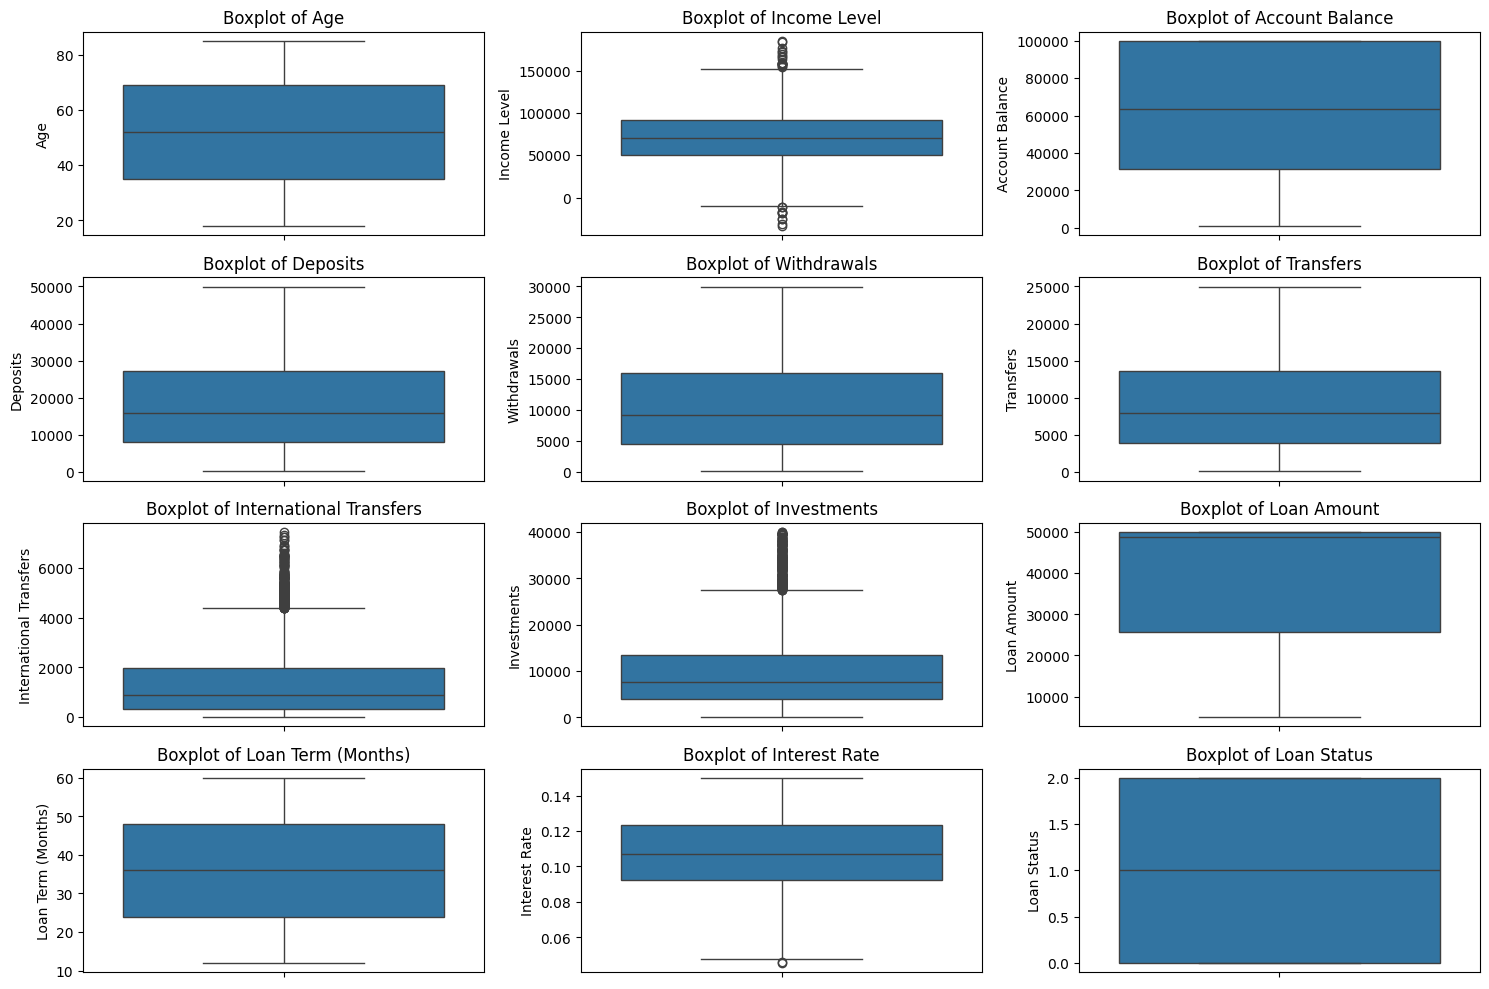

In [ ]:


# List of numerical columns to check for outliers
numerical_columns = ['Age', 'Income Level', 'Account Balance', 'Deposits', 'Withdrawals',
                     'Transfers', 'International Transfers', 'Investments', 'Loan Amount', 'Loan Term (Months)', 'Interest Rate','Loan Status']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



In [ ]:
# Function to calculate and print outliers based on the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers



# Check for outliers in each column
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f'Outliers in {col}:')
    print(outliers, '\n')

Outliers in Age:
Empty DataFrame
Columns: [Age, Risk Tolerance, Income Level, Account Balance, Deposits, Withdrawals, Transfers, International Transfers, Investments, Loan Amount, Loan Purpose, Employment Status, Loan Term (Months), Interest Rate, Loan Status]
Index: [] 

Outliers in Income Level:
      Age  Risk Tolerance  Income Level  Account Balance  Deposits  \
3      27               2     -25488.15          1000.00    299.47   
445    35               0     154122.96        100000.00  16486.31   
472    68               1     166915.11        100000.00  28476.98   
493    39               2     157658.64         31322.51  11283.32   
882    37               0     -25087.86          1000.00    496.90   
940    68               1     -16970.23          1000.00    419.36   
1005   67               2     176385.45        100000.00  35944.08   
1085   52               1     157681.24        100000.00  44956.31   
1223   48               2     -33320.97          1000.00    394.17   
1

In [ ]:
# Function to remove outliers based on IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to keep only non-outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

# Apply the outlier removal function to each column
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

# Check the cleaned dataset
print(df.shape)



(4543, 15)


In [ ]:
#Print the Dataset after Removing Outliers
df

,Age,Risk Tolerance,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status
0,40,0,46044.94,44653.26,9156.01,9327.70,3647.92,82.80,8729.30,27010,3,1,36,0.1194,1
1,30,1,57169.50,29175.47,5933.22,8671.60,6729.86,819.69,4545.18,31266,0,1,36,0.0808,0
2,37,1,71760.86,86141.59,22583.11,16468.58,6032.53,1526.33,8251.45,41260,0,0,12,0.1307,1
4,36,1,106777.95,77918.97,13853.25,22699.32,12189.32,2152.51,9725.21,50000,3,0,24,0.1060,0
5,77,1,59157.22,61520.73,22052.86,16970.19,10103.04,1184.45,4842.19,50000,4,1,24,0.1257,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,30,2,130332.27,48018.74,10625.51,7343.64,6728.61,827.28,7718.63,50000,4,3,12,0.1234,2
4996,20,1,100107.46,29879.73,5384.31,6262.80,3931.47,757.33,2529.55,50000,0,2,24,0.0938,0
4997,53,1,6058.18,9673.78,3274.37,1832.16,1742.00,354.33,898.41,7054,3,2,60,0.1002,1
4998,75,2,76214.25,90780.00,35679.58,12022.55,12832.11,3389.92,6370.88,34847,2,1,48,0.0849,0


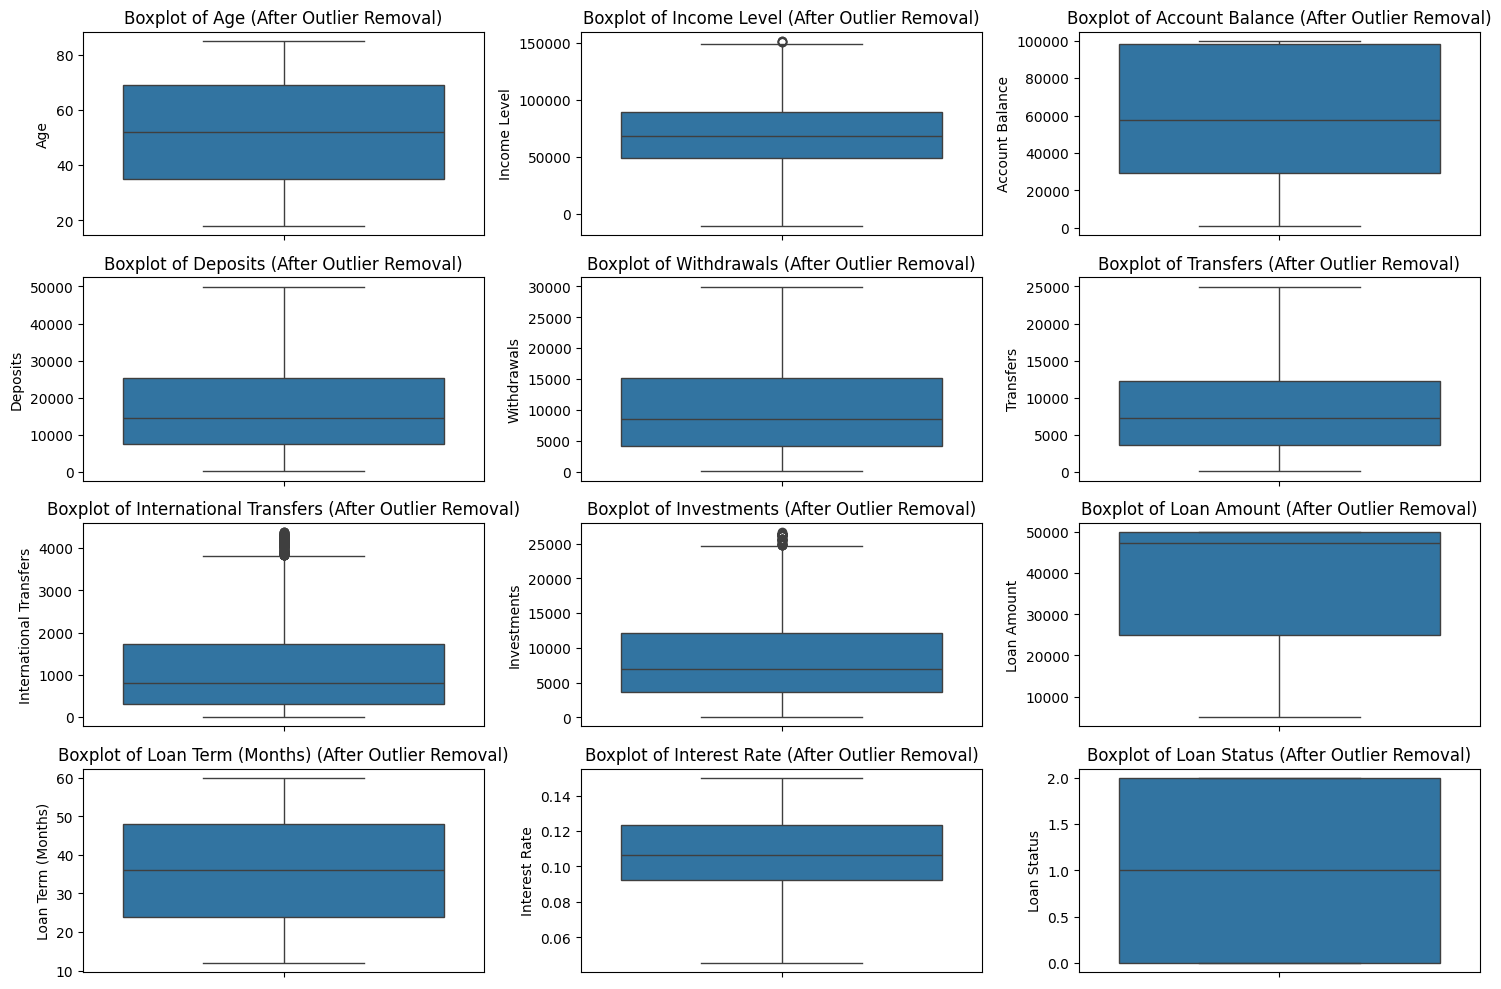

In [ ]:
# Create boxplots for each numerical column after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[col])  # Create boxplot for the column
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

In [ ]:
#Print Summary Stats
summary_stats = df.describe()
summary_stats

,Age,Risk Tolerance,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.00000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,51.747524,1.031037,69032.560048,58729.192562,17551.076634,10361.584785,8462.061944,1153.66573,8317.425466,37561.116223,1.988774,1.507594,36.235087,0.106172,0.824785
std,19.564025,0.804356,29050.625831,32853.316258,12488.095634,7569.718510,5873.715845,1051.45236,5819.257032,15201.436859,1.405502,1.118033,17.064883,0.022089,0.831265
min,18.000000,0.000000,-10338.990000,1000.000000,109.340000,50.500000,51.990000,0.01000,51.220000,5000.000000,0.000000,0.000000,12.000000,0.045600,0.000000
25%,35.000000,0.000000,48731.440000,29056.825000,7457.680000,4120.310000,3614.055000,318.15500,3691.125000,24871.000000,1.000000,1.000000,24.000000,0.092100,0.000000
50%,52.000000,1.000000,68605.300000,57378.220000,14623.090000,8511.190000,7233.530000,817.95000,6984.330000,47406.000000,2.000000,2.000000,36.000000,0.106500,1.000000
75%,69.000000,2.000000,89243.255000,98309.570000,25421.110000,15175.035000,12295.890000,1721.49500,12107.670000,50000.000000,3.000000,3.000000,48.000000,0.123200,2.000000
max,85.000000,2.000000,151827.630000,100000.000000,49992.090000,29996.720000,24991.810000,4378.21000,26656.020000,50000.000000,4.000000,3.000000,60.000000,0.150000,2.000000


In [ ]:
# Columns to standardize
columns_to_standardize = ['Age', 'Income Level', 'Account Balance', 'Withdrawals', 'Transfers', 'Loan Amount', 'Loan Term (Months)', 'Interest Rate']

# Columns to normalize
columns_to_normalize = ['Deposits', 'International Transfers', 'Investments']

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
scaled_finance_data = df.copy()
scaled_finance_data[columns_to_standardize] = scaler_standard.fit_transform(df[columns_to_standardize])

# Normalization (Min-Max scaling)
scaler_normal = MinMaxScaler()
scaled_finance_data[columns_to_normalize] = scaler_normal.fit_transform(df[columns_to_normalize])

# Check the transformed data
scaled_finance_data

,Age,Risk Tolerance,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status
0,-0.600532,0,-0.791382,-0.428495,0.181359,-0.136597,-0.819698,0.018910,0.326185,-0.694163,3,1,-0.013778,0.598894,1
1,-1.111730,1,-0.408403,-0.899665,0.116751,-0.223281,-0.294940,0.187218,0.168915,-0.414159,0,1,-0.013778,-1.148737,0
2,-0.753891,1,0.093926,0.834479,0.450532,0.806855,-0.413673,0.348618,0.308224,0.243351,0,0,-1.420329,1.110507,1
4,-0.805011,1,1.299440,0.584169,0.275524,1.630060,0.634635,0.491640,0.363618,0.818360,3,0,-0.717053,-0.007796,0
5,1.290903,1,-0.339973,0.084979,0.439902,0.873128,0.279407,0.270531,0.180079,0.818360,4,1,-0.717053,0.884129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,-1.111730,2,2.110332,-0.326044,0.210818,-0.398730,-0.295153,0.188952,0.288196,0.818360,4,3,-1.420329,0.779996,2
4996,-1.622929,1,1.069799,-0.878226,0.105747,-0.541531,-0.771418,0.172975,0.093153,0.818360,0,2,-0.717053,-0.560157,0
4997,0.064026,1,-2.167985,-1.493329,0.063449,-1.126906,-1.144216,0.080928,0.031844,-2.007078,3,2,1.392774,-0.270394,1
4998,1.188663,2,0.247240,0.975680,0.713077,0.219446,0.744082,0.774270,0.237538,-0.178563,2,1,0.689498,-0.963108,0


In [ ]:
#Print Summary Stat after Normalize and Standardalize
summary_stats = scaled_finance_data.describe()
summary_stats

,Age,Risk Tolerance,Income Level,Account Balance,Deposits,Withdrawals,Transfers,International Transfers,Investments,Loan Amount,Loan Purpose,Employment Status,Loan Term (Months),Interest Rate,Loan Status
count,4.543000e+03,4543.000000,4.543000e+03,4.543000e+03,4543.000000,4.543000e+03,4.543000e+03,4543.000000,4543.000000,4.543000e+03,4543.000000,4543.000000,4.543000e+03,4.543000e+03,4543.000000
mean,-5.474135e-17,1.031037,-7.311880e-17,8.915020e-17,0.349655,-5.474135e-17,-4.692116e-18,0.263500,0.310704,-2.737068e-18,1.988774,1.507594,-1.329433e-16,5.708741e-16,0.824785
std,1.000110e+00,0.804356,1.000110e+00,1.000110e+00,0.250349,1.000110e+00,1.000110e+00,0.240156,0.218730,1.000110e+00,1.405502,1.118033,1.000110e+00,1.000110e+00,0.831265
min,-1.725168e+00,0.000000,-2.732481e+00,-1.757373e+00,0.000000,-1.362299e+00,-1.431972e+00,0.000000,0.000000,-2.142212e+00,0.000000,0.000000,-1.420329e+00,-2.742432e+00,0.000000
25%,-8.561309e-01,0.000000,-6.988956e-01,-9.032767e-01,0.147312,-8.245963e-01,-8.254639e-01,0.072666,0.136814,-8.348890e-01,1.000000,1.000000,-7.170535e-01,-6.371247e-01,0.000000
50%,1.290655e-02,1.000000,-1.470905e-02,-4.112587e-02,0.290957,-2.444739e-01,-2.091806e-01,0.186821,0.260596,6.476998e-01,2.000000,2.000000,-1.377758e-02,1.484133e-02,1.000000
75%,8.819440e-01,2.000000,6.957826e-01,1.204893e+00,0.507425,6.359523e-01,6.527810e-01,0.393195,0.453168,8.183603e-01,3.000000,3.000000,6.894983e-01,7.709409e-01,2.000000
max,1.699862e+00,2.000000,2.850341e+00,1.256353e+00,1.000000,2.594191e+00,2.814499e+00,1.000000,1.000000,8.183603e-01,4.000000,3.000000,1.392774e+00,1.984322e+00,2.000000


In [ ]:
# Split the data into features (X) and target (y)
X = scaled_finance_data.drop('Loan Status', axis=1)
y = scaled_finance_data['Loan Status']

# Perform the train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to only the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the shapes of the resulting sets
print("Training set size:", X_train_res.shape)
print("Testing set size:", X_test.shape)

Training set size: (4212, 14)
Testing set size: (1363, 14)


In [ ]:
# Train the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=500)
logreg.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7109317681584739
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       633
           1       0.49      0.46      0.47       364
           2       0.48      0.49      0.49       366

    accuracy                           0.71      1363
   macro avg       0.64      0.64      0.64      1363
weighted avg       0.71      0.71      0.71      1363

Confusion Matrix:
 [[622   7   4]
 [  5 166 193]
 [ 16 169 181]]


In [ ]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)


# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7043286867204696
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       633
           1       0.49      0.53      0.51       364
           2       0.51      0.42      0.46       366

    accuracy                           0.70      1363
   macro avg       0.64      0.64      0.64      1363
weighted avg       0.69      0.70      0.70      1363

Confusion Matrix:
 [[614  11   8]
 [ 31 193 140]
 [ 25 188 153]]


In [ ]:
#Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6881878209831255
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       633
           1       0.44      0.50      0.47       364
           2       0.46      0.43      0.44       366

    accuracy                           0.69      1363
   macro avg       0.63      0.63      0.63      1363
weighted avg       0.70      0.69      0.69      1363

Confusion Matrix:
 [[599  24  10]
 [  4 181 179]
 [  6 202 158]]


In [ ]:
# Train the k-NN model (using k=5 as an example)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluation
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

k-NN Accuracy: 0.5854732208363903
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       633
           1       0.43      0.49      0.46       364
           2       0.38      0.37      0.38       366

    accuracy                           0.59      1363
   macro avg       0.54      0.54      0.54      1363
weighted avg       0.59      0.59      0.59      1363

Confusion Matrix:
 [[485  70  78]
 [ 47 177 140]
 [ 66 164 136]]


In [ ]:


# Train the SVM model
svm = SVC(kernel='linear')  # or 'rbf' for non-linear kernel
svm.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



SVM Accuracy: 0.7160674981658107
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       633
           1       0.50      0.45      0.47       364
           2       0.49      0.53      0.51       366

    accuracy                           0.72      1363
   macro avg       0.65      0.65      0.65      1363
weighted avg       0.72      0.72      0.72      1363

Confusion Matrix:
 [[485  70  78]
 [ 47 177 140]
 [ 66 164 136]]


In [ ]:


# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", xgb_model.score(X_test, y_test))
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



XGBoost Accuracy: 0.7226705796038151
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       633
           1       0.49      0.53      0.51       364
           2       0.49      0.46      0.47       366

    accuracy                           0.72      1363
   macro avg       0.66      0.66      0.66      1363
weighted avg       0.72      0.72      0.72      1363

Confusion Matrix:
 [[624   4   5]
 [  2 193 169]
 [  3 195 168]]


In [ ]:
# Define the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Accuracy:", lgb_model.score(X_test, y_test))
print("Classification Report (LightGBM):\n", classification_report(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train set: 4212, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
LightGBM Accuracy: 0.7336757153338225
Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       633
           1       0.51      0.53      0.52       364
           2       0.52      0.50      0.51       366

    accuracy                           0.73      1363
   macro avg       0.67      0.67      0.67      1363
weighte

In [ ]:


# Define the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define a smaller parameter grid for faster tuning
param_dist = {
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train_res, y_train_res)

# Get the best model from random search
r_best_lgb_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_lgb = r_best_lgb_model.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", random_search.best_params_)
print("LightGBM Accuracy (after tuning):", r_best_lgb_model.score(X_test, y_test))
print("Classification Report (LightGBM after tuning)\n:", classification_report(y_test, y_pred_lgb))
print("Confusion Matrix (after tuning):\n", confusion_matrix(y_test, y_pred_lgb))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train set: 4212, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best Hyperparameters: {'subsample': 1.0, 'num_leaves': 31, 'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
LightGBM Accuracy (after tuning): 0.7336757153338225
Classification Report (LightGBM after tuning)
:               precision    recall  f1-score   support

           0       0.99      0.99      0.99  

In [ ]:
# Define the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Optimized parameter grid for faster tuning
param_grid = {
    'num_leaves': [20, 31],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_res, y_train_res)

# Get the best model from grid search
g_best_lgb_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_lgb = g_best_lgb_model.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print("LightGBM Accuracy (after tuning):", g_best_lgb_model.score(X_test, y_test))
print("Classification Report (LightGBM after tuning)\n:", classification_report(y_test, y_pred_lgb))
print("Confusion Matrix (after tuning):\n", confusion_matrix(y_test, y_pred_lgb))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train set: 4212, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}
LightGBM Accuracy (after tuning): 0.7336757153338225
Classification Report (LightGBM after tuning)
:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       633
           1       0.51      0.53      0.52       364


In [ ]:
# Perform cross-validation on the best model found
g_cross_val_scores = cross_val_score(g_best_lgb_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validated accuracy (GridSearchCV):", g_cross_val_scores.mean())

# Perform cross-validation on the best model found by RandomizedSearchCV
r_cross_val_scores_random = cross_val_score(r_best_lgb_model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validated accuracy (RandomizedSearchCV):", r_cross_val_scores_random.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train set: 3369, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train se

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Définir le classificateur LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)

# Grille optimisée pour tuner plus rapidement
param_grid = {
    'num_leaves': [20, 31],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Mise en place de GridSearchCV pour tuner les hyperparamètres
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Entraîner le modèle sur les données d'entraînement réséquencées
grid_search.fit(X_train_res, y_train_res)

# Récupérer le meilleur modèle issu de la recherche
g_best_lgb_model = grid_search.best_estimator_

# Prédire sur les données de test avec ce meilleur modèle
y_pred_lgb = g_best_lgb_model.predict(X_test)

# Évaluer le modèle
print("Best Hyperparameters:", grid_search.best_params_)
print("LightGBM Accuracy (after tuning):", g_best_lgb_model.score(X_test, y_test))
print("Classification Report (LightGBM after tuning):\n", classification_report(y_test, y_pred_lgb))
print("Confusion Matrix (after tuning):\n", confusion_matrix(y_test, y_pred_lgb))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train set: 4212, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}
LightGBM Accuracy (after tuning): 0.7336757153338225
Classification Report (LightGBM after tuning):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99 

In [ ]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
from sklearn.pipeline import Pipeline

# Use SMOTE to oversample minority classes in training set
smote = SMOTE(random_state=42)

# Define LightGBM classifier with class_weight='balanced' to internally weight classes inversely proportional to frequency
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Parameter grid to tune
param_grid = {
    'num_leaves': [20, 31],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a pipeline with only the LightGBM model
pipeline = Pipeline([
    ('lgbm', lgb_model)
])

# Use f1_macro scoring to balance performance across classes
scorer = make_scorer(f1_score, average='macro')

# GridSearchCV with pipeline
grid_search = GridSearchCV(
    pipeline,
    param_grid={'lgbm__' + key: value for key, value in param_grid.items()},
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Apply SMOTE to the training data before fitting the grid search
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit model on resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best tuned model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_search.best_params_)
print("F1 Macro Score (after tuning):", grid_search.best_score_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train set: 4212, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Best Hyperparameters: {'lgbm__colsample_bytree': 1.0, 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 20, 'lgbm__n_estimators': 100, 'lgbm__num_leaves': 31, 'lgbm__subsample': 0.8}
F1 Macro Score (after tuning): 0.8106341886480927
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99  

In [ ]:
#1. Improved Class Weights and SMOTE-ENN Sampling to Balance and Clean Data
from imblearn.combine import SMOTEENN
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score

# SMOTE + Edited Nearest Neighbors (over + under sampling)
smote_enn = SMOTEENN(random_state=42)

# Use custom class weights inversely proportional to frequency
class_weights = {0: 1, 1: 3, 2: 3}

lgb_model = LGBMClassifier(random_state=42, class_weight=class_weights)

param_grid = {
    'num_leaves': [20, 31],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

pipeline = Pipeline([
    ('lgbm', lgb_model)
])

scorer = make_scorer(f1_score, average='macro')

grid_search = GridSearchCV(
    pipeline,
    param_grid={'lgbm__' + key: value for key, value in param_grid.items()},
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Apply SMOTEENN to the training data before fitting the grid search
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)


grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best hyperparameters:", grid_search.best_params_)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2817
[LightGBM] [Info] Number of data points in the train set: 1709, number of used features: 14
[LightGBM] [Info] Start training from score -1.972437
[LightGBM] [Info] Start training from score -0.914049
[LightGBM] [Info] Start training from score -0.776561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:
import numpy as np

# Predict class probabilities
y_proba = best_model.predict_proba(X_test)

# Custom threshold for class separation (example: increase threshold for class 2)
threshold_class_2 = 0.6

# Initialize predictions with default predicted classes
y_pred_custom = best_model.predict(X_test)

# Adjust predictions where class 2 and 3 probs are close
for i, probs in enumerate(y_proba):
    if probs[1] > threshold_class_2 or probs[2] > threshold_class_2:
        if probs[1] > probs[2]:
            y_pred_custom[i] = 1  # class 2
        else:
            y_pred_custom[i] = 2  # class 3

from sklearn.metrics import classification_report, confusion_matrix
print("Classification report with custom threshold:\n", classification_report(y_test, y_pred_custom))
print("Confusion matrix with custom threshold:\n", confusion_matrix(y_test, y_pred_custom))


Classification report with custom threshold:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       633
           1       0.46      0.44      0.45       364
           2       0.48      0.53      0.50       366

    accuracy                           0.70      1363
   macro avg       0.64      0.64      0.64      1363
weighted avg       0.71      0.70      0.71      1363

Confusion matrix with custom threshold:
 [[605  20   8]
 [  0 161 203]
 [  5 167 194]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base models
base_learners = [
    ('lgbm', LGBMClassifier(random_state=42, **grid_search.best_params_)),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100))
]

# Meta-classifier to combine predictions
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacked_model.predict(X_test)
print("Stacked model classification report:\n", classification_report(y_test, y_pred_stack))
print("Stacked model confusion matrix:\n", confusion_matrix(y_test, y_pred_stack))


[LightGBM] [Warning] Unknown parameter: lgbm__learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm__num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm__n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm__colsample_bytree
[LightGBM] [Warning] Unknown parameter: lgbm__max_depth
[LightGBM] [Warning] Unknown parameter: lgbm__subsample
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: lgbm__learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm__num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm__n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm__colsample_bytree
[LightGBM] [Warning] Unknown parameter: lgbm__max_depth
[LightGBM] [Warning] Unknown parameter: lgbm__subsample
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features of degree 2 (interaction + square terms)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model on polynomial features
lgb_poly_model = LGBMClassifier(random_state=42, **grid_search.best_params_)
lgb_poly_model.fit(X_train_poly, y_train)

y_pred_poly = lgb_poly_model.predict(X_test_poly)
print("Polynomial Features classification report:\n", classification_report(y_test, y_pred_poly))
print("Polynomial Features confusion matrix:\n", confusion_matrix(y_test, y_pred_poly))


[LightGBM] [Warning] Unknown parameter: lgbm__learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm__num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm__n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm__colsample_bytree
[LightGBM] [Warning] Unknown parameter: lgbm__max_depth
[LightGBM] [Warning] Unknown parameter: lgbm__subsample
[LightGBM] [Warning] Unknown parameter: lgbm__learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm__num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm__n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm__colsample_bytree
[LightGBM] [Warning] Unknown parameter: lgbm__max_depth
[LightGBM] [Warning] Unknown parameter: lgbm__subsample
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26327
[LightGBM] [Info] Number of data points in the train set: 3180, number of used features: 119
[LightGB

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
model = lgb_poly_model  # Your trained LightGBM model

# Get feature importance scores based on "gain" (how much feature improves accuracy)
feature_importances = model.feature_importances_

# Get feature names (e.g., if polynomial features, this may be numeric indices)
feature_names = [f"feature_{i}" for i in range(len(feature_importances))]

# Combine names and importance into list of tuples and sort descending
feat_imp_pairs = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print top 20 feature importances
print("Top 20 feature importances:")
for name, importance in feat_imp_pairs[:20]:
    print(f"{name}: {importance}")



Top 20 feature importances:
feature_13: 669
feature_9: 420
feature_118: 344
feature_104: 262
feature_112: 197
feature_103: 157
feature_105: 157
feature_97: 129
feature_73: 120
feature_108: 117
feature_20: 113
feature_51: 112
feature_45: 107
feature_67: 106
feature_99: 105
feature_44: 103
feature_69: 102
feature_16: 98
feature_40: 98
feature_10: 97


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Assuming your original feature names are in a list like this:
original_feature_names = list(X_train.columns)  # Use actual column names if X_train is a DataFrame

# Create polynomial features transformer (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly.fit(X_train)

# Get feature names for polynomial features
poly_feature_names = poly.get_feature_names_out(original_feature_names)

# Train LightGBM model on polynomial features (example here)
best_params = {k.replace('lgbm__', ''): v for k, v in grid_search.best_params_.items()}
lgb_poly_model = LGBMClassifier(random_state=42, **best_params)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
lgb_poly_model.fit(X_train_poly, y_train)

# Get feature importances and map to names
importances = lgb_poly_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature_name': poly_feature_names,
    'importance': importances
})

# Sort descending by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display top 20
print(feature_importance_df.head(20))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26327
[LightGBM] [Info] Number of data points in the train set: 3180, number of used features: 119
[LightGBM] [Info] Start training from score -0.817556
[LightGBM] [Info] Start training from score -1.261131
[LightGBM] [Info] Start training from score -1.290413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [ ]:
import shap

explainer = shap.TreeExplainer(best_model.named_steps['lgbm'])
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


NameError: name 'best_model' is not defined

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_probs = lgb_poly_model.predict_proba(X_test_poly)[:, 1]  # Assuming class 1 is the positive class

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs, pos_label=1)

# Find the optimal threshold (you can choose based on your specific needs)
optimal_idx = np.argmax(precision + recall)  # Example: maximizing precision + recall
optimal_threshold = thresholds[optimal_idx]

# Make predictions based on the optimal threshold
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

# Evaluate the adjusted predictions
print("Adjusted classification report:\n", classification_report(y_test, y_pred_adjusted))
print("Adjusted confusion matrix:\n", confusion_matrix(y_test, y_pred_adjusted))


Adjusted classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       633
           1       0.49      1.00      0.65       364
           2       0.00      0.00      0.00       366

    accuracy                           0.72      1363
   macro avg       0.49      0.66      0.55      1363
weighted avg       0.59      0.72      0.63      1363

Adjusted confusion matrix:
 [[613  20   0]
 [  1 363   0]
 [  2 364   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predict

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from imblearn.over_sampling import SMOTE # Import SMOTE

# Define the model with class weights
class_weights = {0: 1, 1: 1, 2: 10}  # Adjusted weights for existing classes
lgb_model = LGBMClassifier(random_state=42, class_weight=class_weights)

# Define hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Create a scorer for weighted F1
weighted_f1_scorer = make_scorer(f1_score, average='weighted')

# Define StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Apply SMOTE to only the training data before fitting the grid search
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Perform grid search using stratified cross-validation
grid_search = GridSearchCV(lgb_model, param_grid, scoring=weighted_f1_scorer, cv=stratified_kfold, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res) # Fit on resampled data

# Train the best model
best_model = grid_search.best_estimator_
# The best model is already trained from the grid search, no need to fit again here
# best_model.fit(X_train_res, y_train) # Remove this line

# Make predictions
y_pred_best = best_model.predict(X_test) # Predict on X_test, not X_test_poly

# Evaluate the model
print("Best model classification report:\n", classification_report(y_test, y_pred_best))
print("Best model confusion matrix:\n", confusion_matrix(y_test, y_pred_best))

NameError: name 'X_train' is not defined

In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.1 MB/s eta 0:00:00


In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.4 MB/s eta 0:00:00
